In [47]:
# Importing the needed modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

# To display plots inside the iPython Notebook itself
%matplotlib inline

In [48]:
# To verify how data is orgainzed in file(to find the delimiter) and then
# use corresponding function to open the file. eg
# data could be in .csv. .tsv, excel format etc.
pathOfDataFile = "data/bank-full.csv"
firstFewLines = list()
noOfLinesToView = 5

with open(pathOfDataFile) as dataFile:
    firstFewLines = [next(dataFile) for i in range(noOfLinesToView)]
    for line in firstFewLines:
        print(line)

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"

58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"

44;"technician";"single";"secondary";"no";29;"yes";"no";"unknown";5;"may";151;1;-1;0;"unknown";"no"

33;"entrepreneur";"married";"secondary";"no";2;"yes";"yes";"unknown";5;"may";76;1;-1;0;"unknown";"no"

47;"blue-collar";"married";"unknown";"no";1506;"yes";"no";"unknown";5;"may";92;1;-1;0;"unknown";"no"



In [49]:
# Import the semi-colon delimited data file into pandas dataFrame
bankPromo_df = pd.read_csv(pathOfDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromo_df = bankPromo_df.rename(columns={"y":"Subscribed"})

# change balance into balance and credit based on amount( negative balances to credit )
bankPromo1_df = bankPromo_df
bankPromo_df['credit'] = bankPromo_df['balance'].apply(lambda resp : (resp*-1) if  resp < 0 else 0.01)
bankPromo_df['new_balance'] = bankPromo_df['balance'].apply(lambda resp : 0.01 if  resp <= 0 else resp)
bankPromo_df[bankPromo1_df['credit'] != 0].head()


#bankPromo_df.head(7)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed,credit,new_balance
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.01,2143.0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.01,29.0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.01,2.0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.01,1506.0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.01,1.0


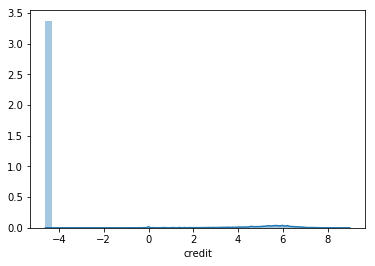

In [50]:
import math
sns.distplot(np.log(bankPromo_df['credit']),kde='true')

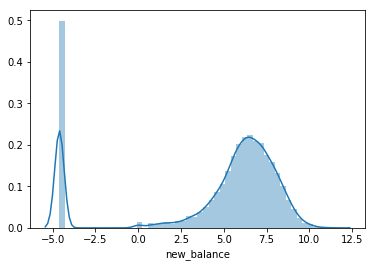

In [51]:
sns.distplot(np.log(bankPromo_df['new_balance']),kde='true')

In [52]:
# Get the unique values(Levels) for categorical variables.
# List to hold names of categorical variables
categoricalVars = list()
# List to hold names of numerical variables
numericalVars = list()

for colName in bankPromo_df.columns:
    if bankPromo_df[colName].dtype == np.int64:
        numericalVars.append(colName)
    elif bankPromo_df[colName].dtype == np.object:
        categoricalVars.append(colName)
    else:
        pass
    
# Remove Target column from final categorical Var list
categoricalVars.remove('Subscribed')

print(numericalVars)
print(categoricalVars)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [53]:
# Make a copy of original data frame
bankPromoModel_Df = bankPromo_df.copy()
bankPromoModel_Df['credit'] = np.log(bankPromoModel_Df['credit'])
bankPromoModel_Df['new_balance'] = np.log(bankPromoModel_Df['new_balance'])
del bankPromoModel_Df['balance']
bankPromoModel_Df['Target'] = bankPromoModel_Df['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoModel_Df['Target'] = bankPromoModel_Df['Target'].astype(np.int)
# Delete the original 'Subscribed' column
del bankPromoModel_Df['Subscribed']

In [54]:
bankPromoModel_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
age            45211 non-null int64
job            45211 non-null object
marital        45211 non-null object
education      45211 non-null object
default        45211 non-null object
housing        45211 non-null object
loan           45211 non-null object
contact        45211 non-null object
day            45211 non-null int64
month          45211 non-null object
duration       45211 non-null int64
campaign       45211 non-null int64
pdays          45211 non-null int64
previous       45211 non-null int64
poutcome       45211 non-null object
credit         45211 non-null float64
new_balance    45211 non-null float64
Target         45211 non-null int32
dtypes: float64(2), int32(1), int64(6), object(9)
memory usage: 6.0+ MB


In [55]:
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoModel_Df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoModel_Df = pd.concat((bankPromoModel_Df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoModel_Df.drop(categoricalVars, inplace=True, axis=1)
bankPromoModel_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 44 columns):
age                    45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
credit                 45211 non-null float64
new_balance            45211 non-null float64
Target                 45211 non-null int32
job_blue-collar        45211 non-null uint8
job_entrepreneur       45211 non-null uint8
job_housemaid          45211 non-null uint8
job_management         45211 non-null uint8
job_retired            45211 non-null uint8
job_self-employed      45211 non-null uint8
job_services           45211 non-null uint8
job_student            45211 non-null uint8
job_technician         45211 non-null uint8
job_unemployed         45211 non-null uint8
job_unknown            45211 non-null uint8
marital

In [57]:
# Training and Test Split
from sklearn.model_selection import ShuffleSplit

if 'Target' in bankPromoModel_Df:
    y = bankPromoModel_Df['Target'].values # get the labels we want
    del bankPromoModel_Df['Target']        # get rid of the class label
    X = bankPromoModel_Df.values           # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# To use the cross validation object in scikit learn, we need to grab an instance
# of the object and set it up. This object will be able to split our data into 
# training and testing splits
num_cv_iterations = 5
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state=999)
                         
print(cv_object)

ShuffleSplit(n_splits=5, random_state=999, test_size=0.2, train_size=None)


#### Additional test dataset 

In [11]:
pathOfAdditionalDataFile = "data/bank.csv"

# Import the semi-colon delimited data file into pandas dataFrame
bankPromoAdditional_df = pd.read_csv(pathOfAdditionalDataFile, sep = ";")

# Rename the Target/Final Outcome column from "y" to "Subscribed" as based on data description.
bankPromoAdditional_df = bankPromoAdditional_df.rename(columns={"y":"Subscribed"})

bankPromoAdditional_df.info()
bankPromoAdditional_df['Target'] = bankPromoAdditional_df['Subscribed'].apply(lambda resp : 1 if resp == "yes" else 0)
bankPromoAdditional_df['Target'] = bankPromoAdditional_df['Target'].astype(np.int)
# Delete the original 'Subscribed' column
del bankPromoAdditional_df['Subscribed']
# Covert all categorical variables to corresponding indicator variables
for categoricalVar in categoricalVars:
    tmpDf = pd.DataFrame()
    # Remove 1st class level to avoid multicollinearity
    tmpDf = pd.get_dummies(bankPromoAdditional_df[categoricalVar], prefix=categoricalVar, drop_first=True)
    bankPromoAdditional_df = pd.concat((bankPromoAdditional_df, tmpDf), axis=1)

# Now remove the original categorical vars since indicator variables are created from them.
bankPromoAdditional_df.drop(categoricalVars, inplace=True, axis=1)

if 'Target' in bankPromoAdditional_df:
    y_Final = bankPromoAdditional_df['Target'].values # get the labels we want
    del bankPromoAdditional_df['Target']        # get rid of the class label
    X_Final = bankPromoAdditional_df.values

bankPromoAdditional_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age           4521 non-null int64
job           4521 non-null object
marital       4521 non-null object
education     4521 non-null object
default       4521 non-null object
balance       4521 non-null int64
housing       4521 non-null object
loan          4521 non-null object
contact       4521 non-null object
day           4521 non-null int64
month         4521 non-null object
duration      4521 non-null int64
campaign      4521 non-null int64
pdays         4521 non-null int64
previous      4521 non-null int64
poutcome      4521 non-null object
Subscribed    4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 42 columns):
age                    4521 non-null int64
balance                4521 non-null int64
day                    4521 non-null int64
duration        

### Create Model

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import DataConversionWarning
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])

# Standardize the features first, since standardizing the features could lead to
# gradient desent algo to converge faster and then run logistic regression model

logisticModel = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', C=1.0, class_weight=None, random_state=999))

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
       
    # train the reusable logisitc regression model on the training data
    logisticModel.fit(X_train,y_train)  # train object
    y_hat = logisticModel.predict(X_test) # get test set precitions

    # now let's get the accuracy,precision,recall,auc,F1 and confusion matrix for this iterations of training/testing
    tmpDict = dict()
    tmpDict['Accuracy'] = mt.accuracy_score(y_test,y_hat)
    tmpDict['AuC'] = mt.roc_auc_score(y_test,y_hat)
    tmpDict['F1 Score'] = mt.f1_score(y_test,y_hat)
    tmpDict['Precision'] = mt.precision_score(y_test,y_hat)
    tmpDict['Recall'] = mt.recall_score(y_test,y_hat)
    
    modelPerformanceMetrices = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

    conf = mt.confusion_matrix(y_test,y_hat)
  
    print("====Iteration",iter_num," ====")
    print("confusion matrix\n",conf)

display(modelPerformanceMetrices)
print("Average Model Performnace Metrices ")
display(modelPerformanceMetrices.mean())

====Iteration 0  ====
confusion matrix
 [[7769  207]
 [ 698  369]]
====Iteration 1  ====
confusion matrix
 [[7829  188]
 [ 678  348]]
====Iteration 2  ====
confusion matrix
 [[7739  198]
 [ 700  406]]
====Iteration 3  ====
confusion matrix
 [[7778  201]
 [ 692  372]]
====Iteration 4  ====
confusion matrix
 [[7776  228]
 [ 646  393]]


,Accuracy,AuC,F1 Score,Precision,Recall
0,0.899923,0.659938,0.449178,0.640625,0.345829
1,0.904235,0.657866,0.445583,0.649254,0.339181
2,0.900697,0.671071,0.474854,0.672185,0.367089
3,0.901250,0.662216,0.454490,0.649215,0.349624
4,0.903351,0.674881,0.473494,0.632850,0.378248


Average Model Performnace Metrices 


Accuracy     0.901891
AuC          0.665195
F1 Score     0.459520
Precision    0.648826
Recall       0.355994
dtype: float64

### Tuning model Hyper parameters using grid search

In [59]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

# Initialize an Empty Dataframe to store Model performance Stats
modelPerformanceMetrices = pd.DataFrame(columns=['Accuracy', 'AuC', 'F1 Score', 'Precision', 'Recall'])

param_grid = {
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 50),
    'logisticregression__solver' : ['liblinear'],
    'logisticregression__class_weight' : [None, 'balanced']}


scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Create grid search object

clf = GridSearchCV(make_pipeline(StandardScaler(), LogisticRegression(random_state=999)), \
                   param_grid = param_grid, cv = 5, verbose=False, n_jobs=-1, scoring=scoring, refit='AUC', \
                   return_train_score=True)

# Fit on data

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
       
    # train the reusable logisitc regression model on the training data
    clf.fit(X_train,y_train)  # train object
    y_hat = clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    tmpDict = dict()
    tmpDict['Accuracy'] = mt.accuracy_score(y_test,y_hat)
    tmpDict['AuC'] = mt.roc_auc_score(y_test,y_hat)
    tmpDict['F1 Score'] = mt.f1_score(y_test,y_hat)
    tmpDict['Precision'] = mt.precision_score(y_test,y_hat)
    tmpDict['Recall'] = mt.recall_score(y_test,y_hat)
    
    modelPerformanceMetrices = modelPerformanceMetrices.append(tmpDict, ignore_index=True)

    conf = mt.confusion_matrix(y_test,y_hat)
  
    print("====Iteration",iter_num," ====")
    print("confusion matrix\n",conf)
    print("Best Estimator Model Parameters\n", clf.best_params_)

display(modelPerformanceMetrices)
print("Average Model Performnace Metrices ")
display(modelPerformanceMetrices.mean())

====Iteration 0  ====
confusion matrix
 [[6720 1256]
 [ 188  879]]
Best Estimator Model Parameters
 {'logisticregression__C': 0.004291934260128779, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}
====Iteration 1  ====
confusion matrix
 [[6830 1187]
 [ 214  812]]
Best Estimator Model Parameters
 {'logisticregression__C': 0.009102981779915217, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
====Iteration 2  ====
confusion matrix
 [[6709 1228]
 [ 184  922]]
Best Estimator Model Parameters
 {'logisticregression__C': 0.009102981779915217, 'logisticregression__class_weight': 'balanced', 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
====Iteration 3  ====
confusion matrix
 [[6714 1265]
 [ 185  879]]
Best Estimator Model Parameters
 {'logisticregression__C': 0.0029470517025518097, 'logisticregression__cl

,Accuracy,AuC,F1 Score,Precision,Recall
0,0.840318,0.833166,0.549032,0.411710,0.823805
1,0.845074,0.821681,0.536860,0.406203,0.791423
2,0.843857,0.839458,0.566339,0.428837,0.833635
3,0.839655,0.833793,0.548005,0.409981,0.826128
4,0.838107,0.832750,0.539623,0.400747,0.825794


Average Model Performnace Metrices 


Accuracy     0.841402
AuC          0.832170
F1 Score     0.547972
Precision    0.411496
Recall       0.820157
dtype: float64

contact_unknown has weight of -0.7293463362561515
housing_yes has weight of -0.3359760413853862
month_jul has weight of -0.2935513456280318
campaign has weight of -0.2590781948091934
month_nov has weight of -0.24192908443608283
month_aug has weight of -0.2286312298954289
month_jan has weight of -0.21056907398241584
month_may has weight of -0.17897453349411951
job_blue-collar has weight of -0.1357046354473806
loan_yes has weight of -0.1337598059086024
marital_married has weight of -0.11087351853172037
job_technician has weight of -0.0768638559354276
job_entrepreneur has weight of -0.07230365992938888
job_services has weight of -0.06905770742134164
job_management has weight of -0.06886473034268469
job_housemaid has weight of -0.06549422630743268
job_self-employed has weight of -0.05982990561618884
contact_telephone has weight of -0.03578864553250037
job_unemployed has weight of -0.032712554065838444
month_feb has weight of -0.02511200962070113
pdays has weight of -0.023934746765063363
jo

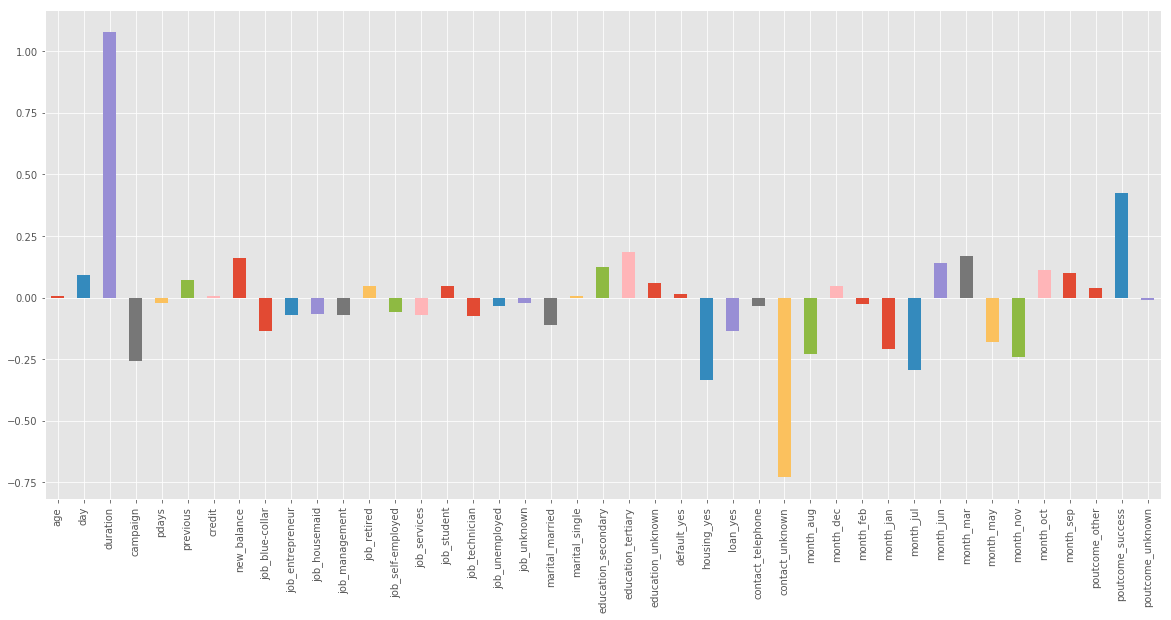

In [61]:
classifier_model = logisticModel.named_steps['logisticregression']
# sort these attributes and spit them out
zip_vars = zip(classifier_model.coef_.T, bankPromoModel_Df.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0])

plt.style.use('ggplot')
plt.figure(figsize=(20,9))
weights = pd.Series(classifier_model.coef_[0],index=bankPromoModel_Df.columns)
weights.plot(kind='bar')
plt.show()